In [2]:
using Flux

In [3]:
NNODE = Chain(x -> [x],
           Dense(1,32,tanh),
           Dense(32,1),
           first)
NNODE(1.0)

-0.26599276f0

In [4]:
g(t) = t*NNODE(t) + 1f0

g (generic function with 1 method)

In [5]:
using Statistics
ϵ = sqrt(eps(Float32))
loss() = mean(abs2(((g(t+ϵ)-g(t))/ϵ) - cos(2π*t)) for t in 0:1f-2:1f0)

loss (generic function with 1 method)

In [6]:
opt = Flux.Descent(0.01)
data = Iterators.repeated((), 5000)
iter = 0
cb = function () #callback function to observe training
  global iter += 1
  if iter % 500 == 0
    display(loss())
  end
end
display(loss())

0.5994251186554737

In [7]:
Flux.train!(loss, Flux.params(NNODE), data, opt; cb=cb)

0.4977329324297004

0.4798777434548418

0.41595736176643555

0.22332637799427887

0.03874805603590393

0.009652733085937299

0.00644231465378021

0.005789846561319475

0.005507875018628117

0.0052597715425146225

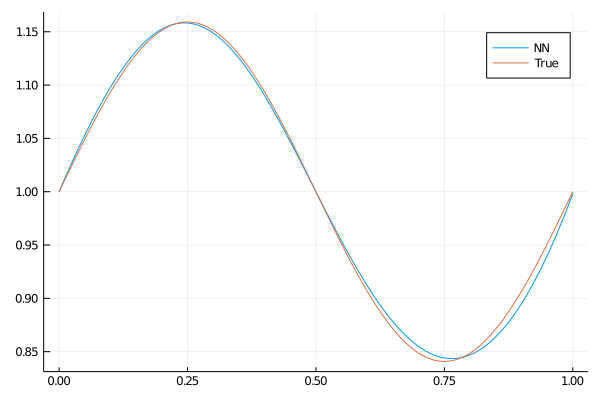

In [8]:
using Plots
t = 0:0.001:1.0
plot(t,g.(t),label="NN")
plot!(t,1.0 .+ sin.(2π.*t)/2π, label = "True")